# STAT 201 Group Proposal Group 27
___________________________________________

## Title: Exploration on the impact of Relationships on academic performance

## Introduction:
Relationships can often have positive impacts on people, increasing their mental and emotional health that could boost stability and academic support, leading to higher GPAs **(Vaeth, 2009, p.7-8)**. But it can also be time consuming and unhealthy, which can detract from a person's studies. This project seeks to answer the question of **whether a student's relationship status affects their academic performance.** The [dataset]( https://www.kaggle.com/datasets/csafrit2/higher-education-students-performance-evaluation), consists of 145 students and their relationship status, cumulative GPA level, expected GPA on graduation, and other information. 

### Preliminary Results: Proportion of student above Cumulative GPA 3.0


In [1]:
# Libraries required for the proposal
suppressPackageStartupMessages({
library(cowplot)
library(datateachr)
library(digest)
library(infer)
library(repr)
library(taxyvr)
library(tidyverse) 
library(tidymodels)
library(datasets)
library(rvest)
library(tibble) 
library(httr)
library(ggplot2)})

In [2]:
student_gpa <- read_csv('https://raw.githubusercontent.com/anjx123/stats201-group-project/Dataset-Refactor/student_prediction.csv', show_col_types = FALSE)
head(student_gpa) # First 6 data

STUDENTID,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,⋯,PREP_STUDY,PREP_EXAM,NOTES,LISTENS,LIKES_DISCUSS,CLASSROOM,CUML_GPA,EXP_GPA,COURSE ID,GRADE
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
STUDENT1,2,2,3,3,1,2,2,1,1,⋯,1,1,3,2,1,2,1,1,1,1
STUDENT2,2,2,3,3,1,2,2,1,1,⋯,1,1,3,2,3,2,2,3,1,1
STUDENT3,2,2,2,3,2,2,2,2,4,⋯,1,1,2,2,1,1,2,2,1,1
STUDENT4,1,1,1,3,1,2,1,2,1,⋯,1,2,3,2,2,1,3,2,1,1
STUDENT5,2,2,1,3,2,2,1,3,1,⋯,2,1,2,2,2,1,2,2,1,1
STUDENT6,2,2,2,3,2,2,2,2,1,⋯,1,1,1,2,1,2,4,4,1,2


                                                Figure 1: Loaded Student Information 

### Data Wrangling

Figure 1 (above) shows the first 6 students obtained from the dataset which contains the different variables such as age, gender, and hours spent on studying. For the project, we are only interested in the `PARTNER`, `CUML_GPA`, and `EXP_GPA` columns and so we start by selecting the columns that we are interested in.

In [3]:
partner_data <- student_gpa |> select(STUDENTID, PARTNER, CUML_GPA,EXP_GPA) |> mutate(PARTNER = recode(PARTNER, '1' = 'Yes', '2' = 'No'))
head(partner_data)

STUDENTID,PARTNER,CUML_GPA,EXP_GPA
<chr>,<chr>,<dbl>,<dbl>
STUDENT1,No,1,1
STUDENT2,No,2,3
STUDENT3,No,2,2
STUDENT4,Yes,3,2
STUDENT5,Yes,2,2
STUDENT6,No,4,4


(writing part: explain the cols:CUML_GPA means, and we figure out the student GPA above the 3.0 which means CUML_GPA greater than 4)

The code as shown in Figure 2 below shows count of students with and without a partner. This will be important to show that we can apply the Central Limit Theorem later. 

In [4]:
partner_data |> summarize(PartnerCount = sum(PARTNER == "Yes"),     # With partner 
                       NoPartnerCount = sum(PARTNER == "No"))     # Without partner

PartnerCount,NoPartnerCount
<int>,<int>
61,84


                    Figure 2: Count of students with partners and without partners

### Preliminary Results: Proportion of student expected GPA above 3.0


We can then group these students by whether they have a partner or not, and calculate the proportion of individuals that have a cumulative and expected GPA higher than level 4 (GPA >= 3.00) which we will deem as "successful" in this project.
(explanation: focus on another parameter related to relationship)

In [5]:
prop_gpas <- partner_data |> group_by(PARTNER) |> 
summarize(count = n(),
    p_gpa_above_3.0 = sum(CUML_GPA >= 4)/count,
    p_expect_gpa_above_3.0 = sum(EXP_GPA >= 4)/count)

    
head(prop_gpas)

PARTNER,count,p_gpa_above_3.0,p_expect_gpa_above_3.0
<chr>,<int>,<dbl>,<dbl>
No,84,0.4404762,0.1904762
Yes,61,0.4590164,0.2295082


            Figure 3: Proportion of students' Cumulative GPA and Expected GPA above 3.0

According Figure 3, we found that the students with partner have slightly higher proportion of Cumulative and Expected GPA above 3.0, than that of students without partners. 

### Visualization: Proportion of students' GPA above 3.0

In order to compare the student performance with the factor `PARTNER`, we visualize the distribution of the cumulative GPA separately, for students with Partners and without Partners. Figure 5a and 5b shows the cumulative GPA for students who had a partner and the culumulative GPA for students who do not have a partner respectively.

Because our project statistics is the proportion for student GPAs greater than 3.0, we use the solid line at CUML_GPA == 4 (which means the GPA at 4 level, 3.0), inspecting if one group of students have higher proportion in the distribution.


In [ ]:

partner_stu_gpa_plot <- partner_data |>
    mutate(bar_color = ifelse(CUML_GPA %in% c(4, 5), "red", "blue")) |>
    filter(PARTNER == "Yes")|>
    ggplot(aes(x = CUML_GPA, fill = bar_color))+
    geom_bar() +
    scale_fill_identity() +
    labs(x = "Cumulative GPA", title = "Cumulative GPA Plot with the partner Students", y = "No. of Students")

no_partner_stu_gpa_plot <- partner_data |>
    mutate(bar_color = ifelse(CUML_GPA %in% c(4, 5), "red", "blue")) |>
    filter(PARTNER == "No")|>
    ggplot(aes(x = CUML_GPA, fill = bar_color))+
    geom_bar() +
    scale_fill_identity() +
    geom_vline(aes(xintercept = 4), color = "red", linetype = "solid", size = 1) +
    labs(x = "Cumulative GPA", title = "Cumulative GPA Plot without partner Students", y = "No. of Students") #+


plot_grid(partner_stu_gpa_plot,no_partner_stu_gpa_plot)

                            Figure 5a & Figure 5b: Sample distribution of Cumulative GPA

### Visualization: Proportion of students' expected GPA greater than 3.0

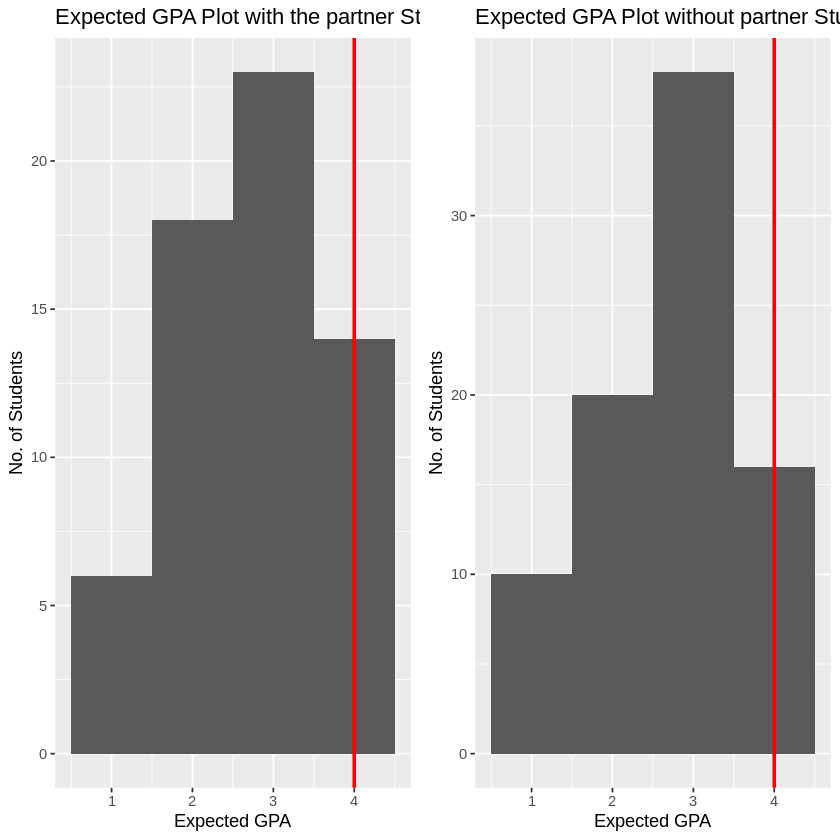

In [38]:
partner_stu_expect_gpa_plot <- partner_data |>
    filter(PARTNER == "Yes")|>
    ggplot(aes(x =EXP_GPA))+
    geom_histogram(binwidth = 1) +
    geom_vline(aes(xintercept = 4), color = "red", linetype = "solid", size = 1) +
    labs(x = "Expected GPA", title = "Expected GPA Plot with the partner Students", y = "No. of Students")

no_partner_stu_expect_gpa_plot <- partner_data |>
    filter(PARTNER == "No")|>
    ggplot(aes(x = EXP_GPA))+
    geom_histogram(binwidth = 1) +
    geom_vline(aes(xintercept = 4), color = "red", linetype = "solid", size = 1) +
    labs(x = "Expected GPA", title = "Expected GPA Plot without partner Students", y = "No. of Students") #+


plot_grid(partner_stu_expect_gpa_plot,no_partner_stu_expect_gpa_plot)

            Figure 6a & Figure 6b: Sample distribution of Expected GPA

(...explanation of the visualization for this factor)

### Methods: Plan
This report is trustworthy as it uses robust statistical frameworks to analyze the data. The hypothesis testing approach which includes bootstrapping to obtain confidence intervals ensures that the conclusions drawn are statistically significant and not due to random chance. In addition, the report uses data collected by a reputable source UCI's Faculty of Engineering and Faculty of Educational Sciences students which gives credit that the sample was taken without bias and representative of the population.

From our preliminary analysis, we see that students with a partner have a higher mean cumulative GPA in the sample than students who do not. However, this would not be sufficient evidence to provide to a stakeholder and declare that having a partner is better for student's GPA. This is because plots do not tell us whether the observed differences are statistically significant as they do not provide a confidence interval to show us how precise our estimates are. Therefore, there’s a risk of drawing inaccurate conclusions due to the inherent randomness of sampling. 

To address these gaps, we will conduct a hypothesis test using the infer package. The framework will be roughly as such
```r  
dataset |> specify |> hypothesize_with_independence |> generate_using_permute |> calculate_the_diff_in_mean |> get_ci |> Graph the bootstrap distribution and confidence interval
``` 
Then we will use `
get_p_value()
`
with direction set to both sides to get the p_value and compare it to a chosen significance level to see whether we should reject the null hypothesis. 

Bootstrapping to obtain the confidence interval (CI) results in fewer assumptions on the data and can be simply obtained by using `get_ci` in the infer package. 
Asymptotic relies on the Central Limit Theorem (CLT) which relies on having a sufficiently sized data set that is not heavily skewed. In this case, It would be alright to use the asymptotic method as the dataset is sufficiently large, and the difference in mean being a sum of values from the population. 

We expect to find that there will be a correlation between being in a relationship and a student's GPA as students in relationships may have more academic, emotional support that could boost mental health and stability leading to higher GPAs **(Vaeth, 2009, p.7-8)**. This is especially when relationship are steady, consequently relationships can be a distraction from studies and lead to a lower GPA when it is unhealthy. 

These findings can help other students make an informed decision of about entering or maintaining relationships during their studies. In addition, it could lead to new strategies for schools to support students such as relationship counseling or workshops on balancing personal life with academic responsibilities. **[Perhaps a Citation]**



### Further Questions ###
What specific aspects of a relationship affect a student's GPA? Is it the emotional support, the time commitment or some other factor? Perhaps we can also explore how different types of relationships have an affect on the GPA.

### References
1. Higher Education Student Performance: https://www.kaggle.com/datasets/csafrit2/higher-education-students-performance-evaluation

2. Student Performance using Artificial Intelligence Techniques: https://link.springer.com/chapter/10.1007/978-3-030-35249-3_76 

3. Comparison of GPA betweenStudents Involved and Uninvolved in a Relationship, Jessica M. Vaeth (2009): https://digitalcommons.lindenwood.edu/cgi/viewcontent.cgi?article=1140&context=psych_journals